In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
from matplotlib.dates import DateFormatter

# Importando Solcast

* Global Horizontal Irradiance*^ (GHI) (W/m2)
* Direct Normal Irradiance*^ (DNI) (W/m2)
* Diffuse Horizontal Irradiance*^ (DHI) (W/m2)

In [2]:
sol = pd.read_csv("../Data/001_Raw/Solcast/csv_-15.838836_-71.093193_fixed_23_0_PT60M.csv", sep=",", index_col=0, parse_dates=True, usecols=[0,3,4,5,6,12])
sol = sol.tz_localize(None)
sol

,air_temp,dni,ghi,dhi,surface_pressure
period_start,,,,,
2007-01-01 00:00:00,3,0,0,0,579.2
2007-01-01 01:00:00,3,0,0,0,578.8
2007-01-01 02:00:00,3,0,0,0,578.4
2007-01-01 03:00:00,3,0,0,0,578.3
2007-01-01 04:00:00,2,0,0,0,578.6
...,...,...,...,...,...
2023-07-31 19:00:00,5,0,0,0,582.1
2023-07-31 20:00:00,4,0,0,0,582.5
2023-07-31 21:00:00,3,0,0,0,582.8


# Importando Senamhi

In [3]:
senamhi = pd.read_csv("../Data/002_Processed/senamhi_2021_2023.csv", index_col=0, parse_dates=True)
senamhi

,To,rain,RH,WD,WS
date,,,,,
2021-12-01 00:00:00,-0.5,0.0,77.0,263.0,2.9
2021-12-01 01:00:00,-0.4,0.0,70.0,212.0,2.2
2021-12-01 02:00:00,-0.8,0.0,71.0,247.0,1.2
2021-12-01 03:00:00,-1.3,0.0,77.0,211.0,0.9
2021-12-01 04:00:00,-1.6,0.0,82.0,188.0,0.8
...,...,...,...,...,...
2023-07-27 19:00:00,-0.8,0.0,23.0,271.0,4.0
2023-07-27 20:00:00,-2.1,0.0,28.0,294.0,4.5
2023-07-27 21:00:00,-2.6,0.0,31.0,269.0,3.3


# Compoaracion

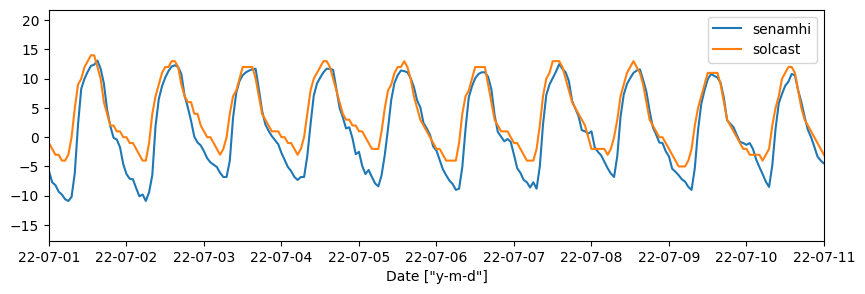

In [4]:
fig, ax = plt.subplots(figsize = (10,3))

fecha1 = parse('2022-07-01')
fecha2 = fecha1 + pd.Timedelta("10D")

data_sol = sol.air_temp
data_sen = senamhi.To

ax.plot(data_sen, label = "senamhi")
ax.plot(data_sol, label = "solcast")

ax.set_xlim(fecha1, fecha2)

plt.xticks(rotation=0)

date_form = DateFormatter("%y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.set(xlabel='Date ["y-m-d"]')
       
ax.legend()

# Concatenando Solcast y Senamhi

In [5]:
a = sol.loc["2022"] 
b = senamhi.loc["2022"]
df = pd.concat([a,b], axis = 1)
df

,air_temp,dni,ghi,dhi,surface_pressure,To,rain,RH,WD,WS
2022-01-01 00:00:00,3,0,0,0,580.0,1.4,0.0,98.0,13.0,1.3
2022-01-01 01:00:00,3,0,0,0,579.6,1.9,0.0,97.0,55.0,4.8
2022-01-01 02:00:00,2,0,0,0,579.4,1.9,0.0,99.0,28.0,4.1
2022-01-01 03:00:00,2,0,0,0,579.4,1.6,0.0,100.0,124.0,1.2
2022-01-01 04:00:00,2,0,0,0,579.5,0.7,0.0,100.0,143.0,1.8
...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2,0,0,0,578.9,0.1,0.0,100.0,267.0,2.8
2022-12-31 20:00:00,1,0,0,0,579.4,0.1,0.0,100.0,270.0,3.6
2022-12-31 21:00:00,2,0,0,0,579.6,0.2,0.0,100.0,292.0,2.7
2022-12-31 22:00:00,2,0,0,0,579.6,0.4,0.2,100.0,290.0,3.7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2022-01-01 00:00:00 to 2022-12-31 23:00:00
Freq: H
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   air_temp          8760 non-null   int64  
 1   dni               8760 non-null   int64  
 2   ghi               8760 non-null   int64  
 3   dhi               8760 non-null   int64  
 4   surface_pressure  8760 non-null   float64
 5   To                8723 non-null   float64
 6   rain              8715 non-null   float64
 7   RH                8722 non-null   float64
 8   WD                8715 non-null   float64
 9   WS                8652 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 752.8 KB


In [7]:
df.describe()

,air_temp,dni,ghi,dhi,surface_pressure,To,rain,RH,WD,WS
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8723.000000,8715.000000,8722.000000,8715.000000,8652.000000
mean,4.101941,319.028881,278.551027,71.301484,579.197283,2.314479,0.039025,58.117863,187.641997,3.867429
std,5.659558,418.267231,363.333937,119.549136,1.122788,6.858689,0.269299,30.545033,87.598663,2.840370
min,-9.000000,0.000000,0.000000,0.000000,575.300000,-15.900000,0.000000,6.000000,0.000000,0.100000
25%,0.000000,0.000000,0.000000,0.000000,578.500000,-2.400000,0.000000,31.000000,123.000000,1.800000
50%,3.000000,0.000000,15.000000,11.000000,579.200000,2.200000,0.000000,57.000000,185.000000,2.800000
75%,9.000000,762.000000,589.000000,77.000000,580.000000,8.000000,0.000000,89.000000,258.000000,5.400000
max,18.000000,1169.000000,1223.000000,613.000000,582.700000,16.700000,5.900000,100.000000,360.000000,15.800000


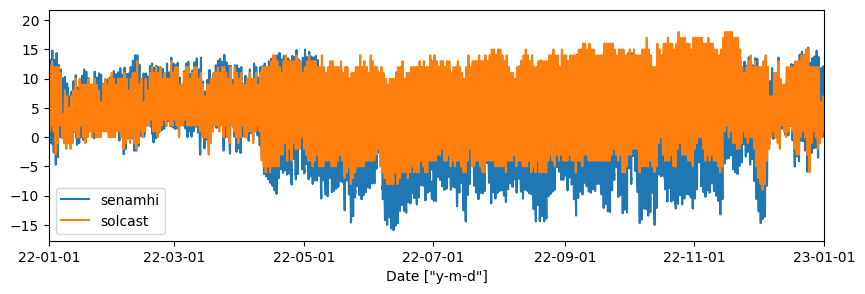

In [8]:
fig, ax = plt.subplots(figsize = (10,3))

fecha1 = parse('2022-01-01')
fecha2 = fecha1 + pd.Timedelta("365D")

data_sol = sol.air_temp
data_sen = senamhi.To

ax.plot(data_sen, label = "senamhi")
ax.plot(data_sol, label = "solcast")

ax.set_xlim(fecha1, fecha2)

plt.xticks(rotation=0)

date_form = DateFormatter("%y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.set(xlabel='Date ["y-m-d"]')
       
ax.legend()

In [9]:
df["P"] = df["surface_pressure"]*100
df

,air_temp,dni,ghi,dhi,surface_pressure,To,rain,RH,WD,WS,P
2022-01-01 00:00:00,3,0,0,0,580.0,1.4,0.0,98.0,13.0,1.3,58000.0
2022-01-01 01:00:00,3,0,0,0,579.6,1.9,0.0,97.0,55.0,4.8,57960.0
2022-01-01 02:00:00,2,0,0,0,579.4,1.9,0.0,99.0,28.0,4.1,57940.0
2022-01-01 03:00:00,2,0,0,0,579.4,1.6,0.0,100.0,124.0,1.2,57940.0
2022-01-01 04:00:00,2,0,0,0,579.5,0.7,0.0,100.0,143.0,1.8,57950.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2,0,0,0,578.9,0.1,0.0,100.0,267.0,2.8,57890.0
2022-12-31 20:00:00,1,0,0,0,579.4,0.1,0.0,100.0,270.0,3.6,57940.0
2022-12-31 21:00:00,2,0,0,0,579.6,0.2,0.0,100.0,292.0,2.7,57960.0
2022-12-31 22:00:00,2,0,0,0,579.6,0.4,0.2,100.0,290.0,3.7,57960.0


# Renombrando el nuevo DF

In [10]:
df_renamed = df.rename(columns = {"dni":"Ib","ghi":"Ig"})
df_renamed

,air_temp,Ib,Ig,dhi,surface_pressure,To,rain,RH,WD,WS,P
2022-01-01 00:00:00,3,0,0,0,580.0,1.4,0.0,98.0,13.0,1.3,58000.0
2022-01-01 01:00:00,3,0,0,0,579.6,1.9,0.0,97.0,55.0,4.8,57960.0
2022-01-01 02:00:00,2,0,0,0,579.4,1.9,0.0,99.0,28.0,4.1,57940.0
2022-01-01 03:00:00,2,0,0,0,579.4,1.6,0.0,100.0,124.0,1.2,57940.0
2022-01-01 04:00:00,2,0,0,0,579.5,0.7,0.0,100.0,143.0,1.8,57950.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2,0,0,0,578.9,0.1,0.0,100.0,267.0,2.8,57890.0
2022-12-31 20:00:00,1,0,0,0,579.4,0.1,0.0,100.0,270.0,3.6,57940.0
2022-12-31 21:00:00,2,0,0,0,579.6,0.2,0.0,100.0,292.0,2.7,57960.0
2022-12-31 22:00:00,2,0,0,0,579.6,0.4,0.2,100.0,290.0,3.7,57960.0


# Preparando el DF para EPW

needed = [ 'Ig', 'To', 'RH', 'WS', 'WD', 'P']

In [11]:
df_for_epw = df_renamed[["Ib","Ig","To","RH","WS","WD","P"]]
df_for_epw

,Ib,Ig,To,RH,WS,WD,P
2022-01-01 00:00:00,0,0,1.4,98.0,1.3,13.0,58000.0
2022-01-01 01:00:00,0,0,1.9,97.0,4.8,55.0,57960.0
2022-01-01 02:00:00,0,0,1.9,99.0,4.1,28.0,57940.0
2022-01-01 03:00:00,0,0,1.6,100.0,1.2,124.0,57940.0
2022-01-01 04:00:00,0,0,0.7,100.0,1.8,143.0,57950.0
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0,0,0.1,100.0,2.8,267.0,57890.0
2022-12-31 20:00:00,0,0,0.1,100.0,3.6,270.0,57940.0
2022-12-31 21:00:00,0,0,0.2,100.0,2.7,292.0,57960.0
2022-12-31 22:00:00,0,0,0.4,100.0,3.7,290.0,57960.0


In [12]:
def df2epw(df):
    df['anio']    = df.index.year
    df['mes']     = df.index.month
    df['dia']     = df.index.day
    df['hora']    = df.index.hour
    df['minutos'] = df.index.minute
    return df[1:]

In [15]:
columnas = ['anio','mes','dia','hora','minutos','To','RH','P',"Ig","Ib",'WD','WS']

tmp = df2epw(df_for_epw)
# tmp = tmp[(tmp.index > '2022-01-26') & (tmp.index < '2022-02-17')]

tmp.to_csv('../Data/002_Processed/Imata_for_epw_2022.csv',
           columns = columnas, header = False, index = False)

tmp

,Ib,Ig,To,RH,WS,WD,P,anio,mes,dia,hora,minutos
2022-01-01 01:00:00,0,0,1.9,97.0,4.8,55.0,57960.0,2022,1,1,1,0
2022-01-01 02:00:00,0,0,1.9,99.0,4.1,28.0,57940.0,2022,1,1,2,0
2022-01-01 03:00:00,0,0,1.6,100.0,1.2,124.0,57940.0,2022,1,1,3,0
2022-01-01 04:00:00,0,0,0.7,100.0,1.8,143.0,57950.0,2022,1,1,4,0
2022-01-01 05:00:00,129,36,0.8,100.0,1.0,160.0,57980.0,2022,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0,0,0.1,100.0,2.8,267.0,57890.0,2022,12,31,19,0
2022-12-31 20:00:00,0,0,0.1,100.0,3.6,270.0,57940.0,2022,12,31,20,0
2022-12-31 21:00:00,0,0,0.2,100.0,2.7,292.0,57960.0,2022,12,31,21,0
2022-12-31 22:00:00,0,0,0.4,100.0,3.7,290.0,57960.0,2022,12,31,22,0


# Energia solar 

In [14]:
solar = df['ghi']
solar

2022-01-01 00:00:00    0
2022-01-01 01:00:00    0
2022-01-01 02:00:00    0
2022-01-01 03:00:00    0
2022-01-01 04:00:00    0
                      ..
2022-12-31 19:00:00    0
2022-12-31 20:00:00    0
2022-12-31 21:00:00    0
2022-12-31 22:00:00    0
2022-12-31 23:00:00    0
Freq: H, Name: ghi, Length: 8760, dtype: int64

In [20]:
energia_mensual = solar.resample('M').sum()
energia_mensual

2022-01-31    173069
2022-02-28    176897
2022-03-31    187949
2022-04-30    188929
2022-05-31    192387
2022-06-30    170893
2022-07-31    180271
2022-08-31    201249
2022-09-30    232419
2022-10-31    267114
2022-11-30    252996
2022-12-31    215934
Freq: M, Name: ghi, dtype: int64

In [21]:
energia_mensual2 = solar.resample('M').mean()
energia_mensual2

2022-01-31    232.619624
2022-02-28    263.239583
2022-03-31    252.619624
2022-04-30    262.401389
2022-05-31    258.584677
2022-06-30    237.351389
2022-07-31    242.299731
2022-08-31    270.495968
2022-09-30    322.804167
2022-10-31    359.024194
2022-11-30    351.383333
2022-12-31    290.233871
Freq: M, Name: ghi, dtype: float64